# 08. 하이브리드 추천 시스템
- 이전까지는 하나의 알고리즘을 사용해서 추천을 하는 (예측값을 구하는) 알고리즘
- 실제로 추천 시스템을 현실에서 구현할 때에는, 다수의 추천 알고리즘을 결합하는 경우가 존재
    
    $\rightarrow$ 다수의 추천 알고리즘을 결합하는 것이 하나의 알고리즘만 사용하는 경우보다 더 정확한 경우가 많기 때문
    
- **복수의 추천 알고리즘을 결합하여 추천을 하는 것이 하이브리드 추천 알고리즘**



<br>

## 08.01. 하이브리드 알고리즘의 장점
- 추천 시스템의 정확도 계산 방법은, 아이템에 대한 개별 사용자의 예측 평점을 알고리즘으로 계산한 후에, 예측평점과 실제평점과의 차이가 정확도가 됨
    
- 하이브리드 추천에서는 복수의 알고리즘이 계산한 개별 사용자의 개별 아이템에 대한 예측치 하나하나에 대해서 일정한 규칙 (예: 평균)으로 결합
    
    - 복수의 알고리즘이 결합되는 경우, 한 알고리즘은 다른 알고리즘의 오류를 보정하는 역할을 하는 경우가 많기 때문

- **한 알고리즘이 잡아내지 못하는 평가 패턴을 다른 알고리즘이 잡아내서 이 둘을 결합하면 서로 보완적인 효과가 발생**

    (복수의 알고리즘의 결합이 항상 좋은 결과를 가져오는 것은 아님)
 

<br>

## 08.02. 하이브리드 시스템의 원리

<br>

#### 2개의 알고리즘을 결합

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.utils import shuffle

In [2]:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('u.data', names=r_cols,  sep='\t',encoding='latin-1')
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)

In [3]:
TRAIN_SIZE = 0.75
ratings = shuffle(ratings, random_state=1)
cutoff = int(TRAIN_SIZE * len(ratings))
ratings_train = ratings.iloc[:cutoff]
ratings_test = ratings.iloc[cutoff:]

In [4]:
def RMSE2(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

<br>

- 2개의 가상 추천엔진 구현

In [6]:
def recommender0(recomm_list):
    recommendations = []
    for pair in recomm_list:
        recommendations.append(random.random() * 4 + 1)
    return np.array(recommendations)

In [7]:
def recommender1(recomm_list):
    recommendations = []
    for pair in recomm_list:
        recommendations.append(random.random() * 4 + 1)
    return np.array(recommendations)

- 2개의 추천엔진에 각각 0.8과 0.2의 가중치를 부여

In [8]:
weight = [0.8, 0.2]
recomm_list = np.array(ratings_test)
predictions0 = recommender0(recomm_list)
predictions1 = recommender1(recomm_list)
predictions = predictions0 * weight[0] + predictions1 * weight[1]
RMSE2(recomm_list[:, 2], predictions)

1.5559028941613362

<br>

## 08.03. CF와 MF의 결합

- $R$행렬

In [12]:
rating_matrix = ratings_train.pivot(index='user_id', columns='movie_id', values='rating')
rating_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1670,1671,1672,1673,1675,1676,1678,1679,1680,1681
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.0,NaN,3.0,NaN,NaN,4.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 사용자 유사도

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
matrix_dummy = rating_matrix.copy().fillna(0)
user_similarity = cosine_similarity(matrix_dummy, matrix_dummy)
user_similarity = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)

In [15]:
user_similarity

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.118894,0.027479,0.043384,0.260520,0.336632,0.307169,0.255234,0.048358,0.311033,...,0.294259,0.087302,0.204429,0.111134,0.132648,0.090740,0.229875,0.082766,0.094420,0.261059
2,0.118894,1.000000,0.087667,0.167153,0.060599,0.184610,0.056137,0.096995,0.138731,0.122185,...,0.085297,0.189758,0.256179,0.272712,0.178380,0.216103,0.185626,0.083104,0.116565,0.038939
3,0.027479,0.087667,1.000000,0.199823,0.028460,0.079827,0.055555,0.080656,0.000000,0.035705,...,0.041629,0.040328,0.109325,0.059769,0.134040,0.019598,0.163782,0.062447,0.131386,0.020482
4,0.043384,0.167153,0.199823,1.000000,0.030303,0.030273,0.072929,0.185741,0.080936,0.084981,...,0.045556,0.000000,0.128589,0.069175,0.123098,0.000000,0.164329,0.066491,0.079274,0.081783
5,0.260520,0.060599,0.028460,0.030303,1.000000,0.169481,0.262558,0.210069,0.072622,0.138234,...,0.260848,0.042810,0.075570,0.051034,0.114721,0.087379,0.207298,0.155782,0.120876,0.232376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.090740,0.216103,0.019598,0.000000,0.087379,0.088731,0.069541,0.095983,0.055567,0.062182,...,0.056636,0.197151,0.169130,0.229859,0.308653,1.000000,0.063317,0.125536,0.021343,0.088901
940,0.229875,0.185626,0.163782,0.164329,0.207298,0.259508,0.222177,0.245705,0.051795,0.249833,...,0.277813,0.094757,0.167268,0.108380,0.142710,0.063317,1.000000,0.056857,0.230674,0.196262
941,0.082766,0.083104,0.062447,0.066491,0.155782,0.076413,0.045202,0.137625,0.088527,0.059929,...,0.026934,0.117419,0.179141,0.202774,0.251722,0.125536,0.056857,1.000000,0.068007,0.029818


- 훈련데이터 사용자의 rating 평균과 영화의 평점편차 계산

In [16]:
rating_mean = rating_matrix.mean(axis=1)
rating_bias = (rating_matrix.T - rating_mean).T

- CF 추천엔진 구현

In [17]:
def CF_knn_bias(user_id, movie_id, neighbor_size=0):
    
    if movie_id in rating_bias:
        sim_scores = user_similarity[user_id]
        movie_ratings = rating_bias[movie_id]
        none_rating_idx = movie_ratings[movie_ratings.isnull()].index
        movie_ratings = movie_ratings.drop(none_rating_idx)
        sim_scores = sim_scores.drop(none_rating_idx)
        
        if neighbor_size == 0:
            prediction = np.dot(sim_scores, movie_ratings) / sim_scores.sum()
            prediction = prediction + rating_mean[user_id]
        else:
            if len(sim_scores) > 1:
                neighbor_size = min(neighbor_size, len(sim_scores))
                sim_scores = np.array(sim_scores)
                movie_ratings = np.array(movie_ratings)
                user_idx = np.argsort(sim_scores)
                sim_scores = sim_scores[user_idx][-neighbor_size:]
                movie_ratings = movie_ratings[user_idx][-neighbor_size:]
                prediction = np.dot(sim_scores, movie_ratings) / sim_scores.sum()
                prediction = prediction + rating_mean[user_id]
            else:
                prediction = rating_mean[user_id]
    else:
        prediction = rating_mean[user_id]
        
    return prediction

- MF 추천엔진 구현

In [18]:
class NEW_MF():
    
    def __init__(self, ratings, K, alpha, beta, iterations, verbose=True):
        self.R = np.array(ratings)
        item_id_index = []
        index_item_id = []
        for i, one_id in enumerate(ratings):
            item_id_index.append([one_id, i])
            index_item_id.append([i, one_id])
            
        self.item_id_index = dict(item_id_index)
        self.index_item_id = dict(index_item_id)    
        
        user_id_index = []
        index_user_id = []
        for i, one_id in enumerate(ratings.T):
            user_id_index.append([one_id, i])
            index_user_id.append([i, one_id])
            
        self.user_id_index = dict(user_id_index)
        self.index_user_id = dict(index_user_id)
        self.num_users, self.num_items = np.shape(self.R)
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.verbose = verbose

    def rmse(self):
        
        xs, ys = self.R.nonzero()
        self.predictions = []
        self.errors = []
        for x, y in zip(xs, ys):
            prediction = self.get_prediction(x, y)
            self.predictions.append(prediction)
            self.errors.append(self.R[x, y] - prediction)
            
        self.predictions = np.array(self.predictions)
        self.errors = np.array(self.errors)
        
        return np.sqrt(np.mean(self.errors**2))

    def get_prediction(self, i, j):
        
        prediction = self.b + self.b_u[i] + self.b_d[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_prediction(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_d[j] += self.alpha * (e - self.beta * self.b_d[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def set_test(self, ratings_test):
        
        test_set = []
        for i in range(len(ratings_test)):
            x = self.user_id_index[ratings_test.iloc[i, 0]]
            y = self.item_id_index[ratings_test.iloc[i, 1]]
            z = ratings_test.iloc[i, 2]
            test_set.append([x, y, z])
            self.R[x, y] = 0               
            
        self.test_set = test_set
        
        return test_set                         

    def test_rmse(self):
        
        error = 0
        for one_set in self.test_set:
            predicted = self.get_prediction(one_set[0], one_set[1])
            error += pow(one_set[2] - predicted, 2)
            
        return np.sqrt(error/len(self.test_set))

    def test(self):

        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        self.b_u = np.zeros(self.num_users)
        self.b_d = np.zeros(self.num_items)
        self.b = np.mean(self.R[self.R.nonzero()])

        rows, columns = self.R.nonzero()
        self.samples = [(i, j, self.R[i,j]) for i, j in zip(rows, columns)]

        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            rmse1 = self.rmse()
            rmse2 = self.test_rmse()
            training_process.append((i+1, rmse1, rmse2))
            if self.verbose:
                if (i+1) % 10 == 0:
                    print("Iteration: %d ; Train RMSE = %.4f ; Test RMSE = %.4f" % (i+1, rmse1, rmse2))
                    
        return training_process

    def get_one_prediction(self, user_id, item_id):
        prediction = self.get_prediction(self.user_id_index[user_id], self.item_id_index[item_id])
        return prediction

    def full_prediction(self):
        return self.b + self.b_u[:,np.newaxis] + self.b_d[np.newaxis,:] + self.P.dot(self.Q.T)

- MF 학습


In [19]:
R_temp = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
mf = NEW_MF(R_temp, K=200, alpha=0.001, beta=0.02, iterations=250, verbose=True)
test_set = mf.set_test(ratings_test)
result = mf.test()

Iteration: 10 ; Train RMSE = 0.9664 ; Test RMSE = 0.9834
Iteration: 20 ; Train RMSE = 0.9420 ; Test RMSE = 0.9644
Iteration: 30 ; Train RMSE = 0.9313 ; Test RMSE = 0.9566
Iteration: 40 ; Train RMSE = 0.9253 ; Test RMSE = 0.9524
Iteration: 50 ; Train RMSE = 0.9214 ; Test RMSE = 0.9497
Iteration: 60 ; Train RMSE = 0.9186 ; Test RMSE = 0.9480
Iteration: 70 ; Train RMSE = 0.9165 ; Test RMSE = 0.9468
Iteration: 80 ; Train RMSE = 0.9148 ; Test RMSE = 0.9459
Iteration: 90 ; Train RMSE = 0.9131 ; Test RMSE = 0.9452
Iteration: 100 ; Train RMSE = 0.9113 ; Test RMSE = 0.9444
Iteration: 110 ; Train RMSE = 0.9090 ; Test RMSE = 0.9436
Iteration: 120 ; Train RMSE = 0.9059 ; Test RMSE = 0.9425
Iteration: 130 ; Train RMSE = 0.9015 ; Test RMSE = 0.9408
Iteration: 140 ; Train RMSE = 0.8953 ; Test RMSE = 0.9385
Iteration: 150 ; Train RMSE = 0.8869 ; Test RMSE = 0.9353
Iteration: 160 ; Train RMSE = 0.8764 ; Test RMSE = 0.9317
Iteration: 170 ; Train RMSE = 0.8642 ; Test RMSE = 0.9279
Iteration: 180 ; Train 

<br>

- 테스트 데이터에 대하여 각 추천엔진 적용 및 결합
    - CF:MF = 0.8:0.2 의 비율로 결합

In [20]:
def recommender0(recomm_list, mf):
    recommendations = np.array([mf.get_one_prediction(user, movie) for (user, movie) in recomm_list])
    return recommendations

In [21]:
def recommender1(recomm_list, neighbor_size=0):
    recommendations = np.array([CF_knn_bias(user, movie, neighbor_size) for (user, movie) in recomm_list])
    return recommendations

In [27]:
recomm_list = np.array(ratings_test.iloc[:, [0, 1]])

predictions0 = recommender0(recomm_list, mf)
RMSE2(ratings_test.iloc[:, 2], predictions0)

0.9103337618885173

In [28]:
predictions1 = recommender1(recomm_list, 37)
RMSE2(ratings_test.iloc[:, 2], predictions1)

0.9467199341641682

In [29]:
weight = [0.8, 0.2]
predictions = predictions0 * weight[0] + predictions1 * weight[1]
RMSE2(ratings_test.iloc[:, 2], predictions)

0.9098686922067888

- MF 알고리즘의 RMSE는 약 0.9103, CF 알고리즘의 RMSE는 약 0.946719
    
- 두 결과를 결합한 하이브리드 추천 시스템은 RMSE가 약 0.9099

    $\rightarrow$ 미세하지만 두 알고리즘보다 더 좋은 결과

<br>

#### 최적의 결합 가중치 탐색
- CF:MF = 0.88:0.12가 최적의 가중치

In [32]:
weight_a = []
RMSE_ = []
for i in np.arange(0, 1, 0.01):
    
    weight = [i, 1.0 - i]
    predictions = predictions0 * weight[0] + predictions1 * weight[1]
    weight_a.append(weight[0])
    RMSE_.append(RMSE2(ratings_test.iloc[:, 2], predictions))
#     print("Weights - %.2f : %.2f ; RMSE = %.7f" % (weight[0], 
#            weight[1], ))

In [39]:
weight_a[np.argmin(RMSE_)]

0.88

In [34]:
import matplotlib.pyplot as plt

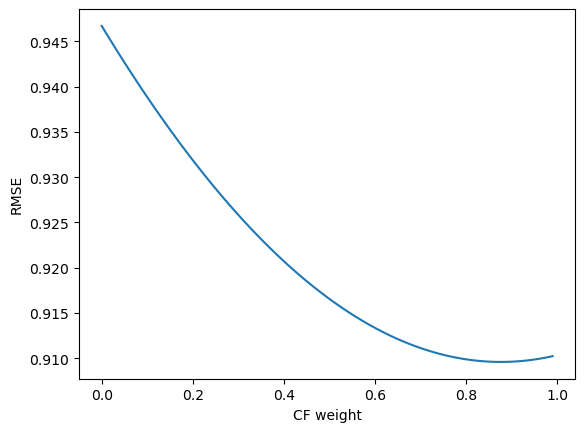

In [36]:
plt.plot(weight_a, RMSE_)
plt.xlabel('CF weight')
plt.ylabel('RMSE')
plt.show()